# LangChain and LangGraph

In [1]:
!python -m pip install langchain langchain-core langchain-community langchain-experimental --quiet
!python -m pip install langchain-openai --quiet

In [4]:
model_name='gpt4o'

### Chatmodels, Prompt Templates and Parsers

In [3]:
from langchain_openai import AzureChatOpenAI

model = AzureChatOpenAI(model=model_name)

# use it as an LLM -> pass a prompt
prompt = "Write a poem about the city Bangalore"
response = model.invoke(prompt)
print(response.content)

In the heart of India, where the gardens bloom,  
Bangalore whispers secrets in the twilight's gloom.  
A city of contrasts, where old meets the new,  
With history entwined in every avenue.  

Silicon dreams in the tech-savvy air,  
With startups and visions, ambition laid bare.  
Yet beneath the hustle, the spirit flows free,  
In the laughter of children, in the shade of a tree.  

The brew of the morning, a cup of good cheer,  
Filter coffee warms hands as the day draws near.  
Markets are bustling, with colors ablaze,  
K R Market sings in a vibrant array.  

Each street tells a story, each corner a tale,  
Of rickshaws and roadways, where dreams never pale.  
From Lalbagh's gardens to Cubbon's green park,  
Nature embraces, igniting a spark.  

The warmth of the people, their smiles like the sun,  
Together they forge a rhythm, a run.  
In pubs that echo with laughter and song,  
Unity thrives, where all can belong.  

As dusk paints the city in hues rich and deep,  
With promise

In [4]:
# use it as a chatmodel - pass a chatprompt

from langchain_core.messages import HumanMessage

message = [HumanMessage(content="Hi How are you?")]
model.invoke(message)


AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 12, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CDkQIXtuecnC9q7Uyqpe8pM9TcGtY', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logpr

In [5]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate

system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])
prompt_temp

ChatPromptTemplate(input_variables=['language', 'text'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='Translate the following into the language {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='{text}'), additional_kwargs={})])

In [6]:
prompt_temp.input_variables

['language', 'text']

In [7]:
myprompt = prompt_temp.invoke({"language":"French","text":"Hi How are you?"})
myprompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following into the language French', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi How are you?', additional_kwargs={}, response_metadata={})])

In [8]:
op = model.invoke(myprompt)
op

AIMessage(content='Salut, comment ça va ?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CDkTddUBqR26xx7qR2cOFtk9QfL1B', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protecte

In [9]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
parser.invoke(op)

'Salut, comment ça va ?'

## Automation using Chains: Automations / Automation Flows / Chains / Chain Workflows
- static workflows involving LLMs inbetween the steps, 
- the flow of data, steps are deterministic, decided by the developer/SME

**Example**

Language Translation Chain: input -----> [Prompt Templates >> LLM >> Parser ]----> Output

In [10]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate
system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])

# initialize llm
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model=model_name)

# initialize parser
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

In [11]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

'మీ పేరు ఏమిటి?'

In [13]:
def format_output(text):
    return {"Translation":text}

In [14]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser | format_output

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

{'Translation': 'మీ పేరు ఏమిటి?'}

#### Code Chain

In [15]:
# Code generation chain
generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])

generation_chain = generate_prompt | model | parser

op = generation_chain.invoke("fibonacci series")
print(op)

```python
def fibonacci(n):
    series = [0, 1]
    for i in range(2, n):
        next_fib = series[i-1] + series[i-2]
        series.append(next_fib)
    return series[:n]

n = int(input("Enter the number of terms: "))
print(fibonacci(n))
```


In [16]:
analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])

analyze_chain = analyze_prompt | model | parser
print(analyze_chain.invoke({"code":op}))

```python
def fibonacci(n):
    """
    Generate a Fibonacci series up to the n-th term.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the Fibonacci series up to the n-th term.
    """
    # Initialize the series with the first two Fibonacci numbers
    series = [0, 1]
    
    # Calculate subsequent Fibonacci numbers up to n terms
    for i in range(2, n):
        next_fib = series[i-1] + series[i-2]  # Compute the next Fibonacci number
        series.append(next_fib)  # Append the next number to the series

    # Return the series truncated to n terms
    return series[:n]

# Prompt the user to enter the desired number of terms
n = int(input("Enter the number of terms: "))

# Print the generated Fibonacci series
print(fibonacci(n))
```


In [17]:
def patch_inputs (code):
    return {"code":code}

final_chain = generation_chain | patch_inputs | analyze_chain
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a Fibonacci series of n numbers.
    
    The Fibonacci series is a sequence where each number is the sum of the two preceding ones,
    usually starting with 0 and 1. This function returns a list containing the first n numbers
    in the Fibonacci series.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the first n numbers in the Fibonacci series.
    """
    a, b = 0, 1  # Initialize the first two Fibonacci numbers
    series = []  # List to store the Fibonacci series
    for _ in range(n):  # Loop n times to generate the series
        series.append(a)  # Append the current Fibonacci number to the series
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers
    return series  # Return the complete series

# Example usage
n = 10  # Define the number of terms in the Fibonacci series
print(fibonacci(n))  # Print the first n terms of the 

In [18]:
final_chain = generate_prompt | model | parser | patch_inputs | analyze_prompt | model | parser
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a Fibonacci sequence of length n.

    Args:
        n (int): The number of terms in the Fibonacci sequence to generate.

    Returns:
        list: A list containing the Fibonacci sequence up to n terms.
    """
    fib_sequence = []  # Initialize an empty list to store the Fibonacci sequence
    a, b = 0, 1  # Starting values for the Fibonacci sequence

    # Loop n times to generate the sequence
    for _ in range(n):
        fib_sequence.append(a)  # Append the current Fibonacci number to the sequence
        a, b = b, a + b  # Update a and b to the next Fibonacci numbers

    return fib_sequence  # Return the complete Fibonacci sequence

# Example usage
n = 10  # Specify the number of Fibonacci terms to generate
print(fibonacci(n))  # Print the generated Fibonacci sequence
```


### Tools with Langchain

In [19]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2))

wiki.invoke("Artificial Intelligence")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

In [20]:
print(wiki.name)
print(wiki.description)
print(wiki.args)

wikipedia
A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
{'query': {'description': 'query to look up on wikipedia', 'title': 'Query', 'type': 'string'}}


In [21]:
search_prompt = ChatPromptTemplate.from_template("generate a query to be searched on wikipedia for a given user inputs {input} . keep it short")

chain = search_prompt | model | parser | wiki | parser

chain.invoke({"input":"I am interested in world war II"})

'Page: Clate\nSummary: Clate (also known as Clett) is a hamlet and ward in southwestern Whalsay in the parish of Nesting in the Shetland Islands of Scotland.\n\nPage: Military budget of the United States\nSummary: The military budget of the United States is the largest portion of the discretionary federal budget allocated to the Department of Defense (DoD), or more broadly, the portion of the budget that goes to any military-related expenditures. The military budget pays the salaries, training, and health care of uniformed and civilian personnel, maintains arms, equipment and facilities, funds operations, and develops and buys new items. The budget funds six branches of the US military: the Army, Navy, Marine Corps, Coast Guard, Air Force, and Space Force.'

## Getting started with LangGraph

- compatiable with langchain tools: langchain, langsmith, langfuse, openai
- represent codes/functions/code_blocks as nodes and represent interactions as connections in graph



Key components

- Node: individual step/action (a function which makes llm call)
- Edges: connection between nodes, define the exection flow between nodes
- Graph: collection of nodes and edges, a complete structures
- State: a shared data structure followed by all nodes and connections ( a common schema)

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
# initiate a state

from typing import TypedDict

class myState(TypedDict):
    query:str
    response:str
    

In [7]:
# create a node

from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate

llm = AzureChatOpenAI(model=model_name)

# define a node: a node will alwaystake state (myState) as input and return state variables as output
def assistant(state:myState)->myState:
    prompt = PromptTemplate(input_variables=["query"],
                            template="Anwer the question in concise way {query}")
    
    response = llm.invoke(prompt.format(query=state['query'])).content
    return {"response":response}


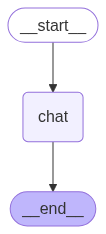

In [8]:
# build graph
from langgraph.graph import StateGraph,START,END

builder = StateGraph(myState)
builder.add_node("chat",assistant)
builder.add_edge(START,"chat")
builder.add_edge("chat",END)

graph = builder.compile()
graph

In [9]:
result = graph.invoke({"query":"What is capital of Canada?"})
print(result)

{'query': 'What is capital of Canada?', 'response': 'The capital of Canada is Ottawa.'}


In [10]:
print(result['response'])

The capital of Canada is Ottawa.


In [11]:
class myState(TypedDict):
    query:str
    response:str
    valid:bool

In [12]:
# adding an additional node: validting the input

# adding a node: checker which checks the input and validates based on certain rules
def checker(state:myState)->myState:
    if len(state['query'].strip())<10:
        return {"valid":False,"response":"ENTER A VALID QUESTION"}
    else:
        return {"valid":True}

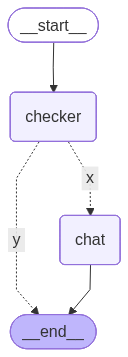

In [13]:
builder = StateGraph(myState)

builder.add_node("checker",checker)
builder.add_node("chat",assistant)

# add connection
builder.add_edge(START,"checker")


# add a conditional edge
def route(state:myState):
    if state['valid']:
        return "x"
    else:
        return "y"
    
builder.add_conditional_edges("checker",route,{"x":"chat","y":END})
builder.add_edge("chat",END)


graph = builder.compile()
graph

In [14]:
result = graph.invoke({"query":"what is capital of France?"})
print(result)

{'query': 'what is capital of France?', 'response': 'The capital of France is Paris.', 'valid': True}


In [15]:
result = graph.invoke({"query":"what ?       "})
print(result)

{'query': 'what ?       ', 'response': 'ENTER A VALID QUESTION', 'valid': False}


## Code Chain

- Generate code, analyze code

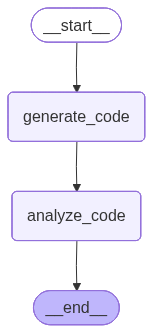

In [16]:
from typing import TypedDict
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
llm = AzureChatOpenAI(model=model_name)

class simpleState(TypedDict):
    code:str
    task:str
    modified_code:str


def generate_code(state:simpleState)->simpleState:
    generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])
    code = llm.invoke(generate_prompt.invoke({"task":state["task"]})).content
    return {"code":code}


def analyze_code(state:simpleState)->simpleState:
    analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])
    modified_code = llm.invoke(analyze_prompt.invoke({"code":state["code"]})).content
    return {"modified_code":modified_code}


builder = StateGraph(simpleState)
builder.add_sequence([generate_code,analyze_code])
builder.add_edge(START,"generate_code")

graph = builder.compile()
graph

    

In [17]:
result = graph.invoke({"task":"FIBONACCI SERIES"})

In [18]:
print(result)

{'code': '```python\ndef fibonacci(n):\n    fib_sequence = []\n    a, b = 0, 1\n    for _ in range(n):\n        fib_sequence.append(a)\n        a, b = b, a + b\n    return fib_sequence\n\n# Example usage\nn = 10  # Number of Fibonacci numbers to generate\nprint(fibonacci(n))\n```', 'task': 'FIBONACCI SERIES', 'modified_code': '```python\ndef fibonacci(n):\n    """\n    Generate a Fibonacci sequence up to the n-th number.\n\n    Parameters:\n    n (int): The number of Fibonacci numbers to generate.\n\n    Returns:\n    list: A list containing the Fibonacci sequence.\n    """\n    fib_sequence = []  # Initialize an empty list to store the Fibonacci numbers\n    a, b = 0, 1  # Starting values for the Fibonacci sequence\n    \n    # Iterate n times to generate n Fibonacci numbers\n    for _ in range(n):\n        fib_sequence.append(a)  # Append the current Fibonacci number (a) to the list\n        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers\n\n    return fib_sequenc

In [19]:
print(result['code'])

```python
def fibonacci(n):
    fib_sequence = []
    a, b = 0, 1
    for _ in range(n):
        fib_sequence.append(a)
        a, b = b, a + b
    return fib_sequence

# Example usage
n = 10  # Number of Fibonacci numbers to generate
print(fibonacci(n))
```


In [20]:
print(result['modified_code'])

```python
def fibonacci(n):
    """
    Generate a Fibonacci sequence up to the n-th number.

    Parameters:
    n (int): The number of Fibonacci numbers to generate.

    Returns:
    list: A list containing the Fibonacci sequence.
    """
    fib_sequence = []  # Initialize an empty list to store the Fibonacci numbers
    a, b = 0, 1  # Starting values for the Fibonacci sequence
    
    # Iterate n times to generate n Fibonacci numbers
    for _ in range(n):
        fib_sequence.append(a)  # Append the current Fibonacci number (a) to the list
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers

    return fib_sequence  # Return the generated list of Fibonacci numbers

# Example usage
n = 10  # Number of Fibonacci numbers to generate
print(fibonacci(n))  # Output the list of Fibonacci numbers
```
